yfinance => Python library that allows you to download historical market data from Yahoo Finance. It is commonly used for stock price analysis, time series forecasting, and financial modeling.



In [5]:
import sys
!{sys.executable} -m pip install yfinance


In [6]:


import yfinance as yf

# Download historical stock data (Example: AAPL - Apple)
df = yf.download("AAPL", start="2015-01-01", end="2024-01-01")

# Display first few rows
print(df.head())

# Save dataset to CSV
df.to_csv("AAPL_stock_data.csv")


[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2015-01-02  24.320423  24.789792  23.879972  24.778669  212818400
2015-01-05  23.635284  24.169164  23.448427  24.089082  257142000
2015-01-06  23.637506  23.897772  23.274912  23.699792  263188400
2015-01-07  23.968962  24.069063  23.735389  23.846614  160423600
2015-01-08  24.889910  24.947747  24.180294  24.298194  237458000


In [7]:
print(df.head())

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2015-01-02  24.320423  24.789792  23.879972  24.778669  212818400
2015-01-05  23.635284  24.169164  23.448427  24.089082  257142000
2015-01-06  23.637506  23.897772  23.274912  23.699792  263188400
2015-01-07  23.968962  24.069063  23.735389  23.846614  160423600
2015-01-08  24.889910  24.947747  24.180294  24.298194  237458000


Open → Opening price

High → Highest price of the day

Low → Lowest price of the day

Close → Closing price of the stock

Adj Close → Adjusted closing price (removes stock splits)

Volume → Total number of shares traded

In [8]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("AAPL_stock_data.csv", index_col=0)

# Display dataset info
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
Index: 2266 entries, Ticker to 2023-12-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   2265 non-null   object
 1   High    2265 non-null   object
 2   Low     2265 non-null   object
 3   Open    2265 non-null   object
 4   Volume  2265 non-null   object
dtypes: object(5)
memory usage: 106.2+ KB
None
                         Close                High                 Low  \
Price                                                                    
Ticker                    AAPL                AAPL                AAPL   
Date                       NaN                 NaN                 NaN   
2015-01-02  24.320423126220703  24.789792071440623  23.879972027478615   
2015-01-05  23.635284423828125  24.169164129068307    23.4484274604303   
2015-01-06   23.63750648498535   23.89777223644289  23.274912374186805   

                          Open     Volume  
Price                     

In [9]:
import pandas as pd

# Load dataset, skipping the first 3 rows
df = pd.read_csv("AAPL_stock_data.csv", skiprows=3, header=None)

# Manually define correct column names
df.columns = ["Date", "Close", "High", "Low", "Open", "Volume"]

# Convert 'Date' to datetime format (YYYY-MM-DD format detected)
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")

# Set 'Date' as index
df.set_index("Date", inplace=True)

# Display first few rows
print(df.head())
print(df.info())  # Check if Date is properly formatted


                Close       High        Low       Open     Volume
Date                                                             
2015-01-02  24.320423  24.789792  23.879972  24.778669  212818400
2015-01-05  23.635284  24.169164  23.448427  24.089082  257142000
2015-01-06  23.637506  23.897772  23.274912  23.699792  263188400
2015-01-07  23.968962  24.069063  23.735389  23.846614  160423600
2015-01-08  24.889910  24.947747  24.180294  24.298194  237458000
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2264 entries, 2015-01-02 to 2023-12-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2264 non-null   float64
 1   High    2264 non-null   float64
 2   Low     2264 non-null   float64
 3   Open    2264 non-null   float64
 4   Volume  2264 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 106.1 KB
None


In [10]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values using forward fill
#df.fillna(method='ffill', inplace=True)

Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


Feature Engineering (Add Technical Indicators)
We will create 7 new features:

✅ Moving Averages: 10-day, 50-day SMA

✅ Exponential Moving Average (EMA)

✅ Volatility: Rolling standard deviation

✅ Relative Strength Index (RSI)

✅ Moving Average Convergence Divergence (MACD)

In [11]:
# Moving Averages
df["SMA_10"] = df["Close"].rolling(window=10).mean()
df["SMA_50"] = df["Close"].rolling(window=50).mean()

# Exponential Moving Average
df["EMA_10"] = df["Close"].ewm(span=10, adjust=False).mean()

# Volatility (Rolling Standard Deviation)
df["Volatility"] = df["Close"].rolling(window=10).std()

# Relative Strength Index (RSI)
def compute_rsi(series, window=14):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

df["RSI"] = compute_rsi(df["Close"], 14)

# MACD (Moving Average Convergence Divergence)
df["EMA_12"] = df["Close"].ewm(span=12, adjust=False).mean()
df["EMA_26"] = df["Close"].ewm(span=26, adjust=False).mean()
df["MACD"] = df["EMA_12"] - df["EMA_26"]
df["Signal_Line"] = df["MACD"].ewm(span=9, adjust=False).mean()

# Drop unnecessary columns
df.drop(columns=["EMA_12", "EMA_26"], inplace=True)

print(df.tail())  # Check the new features


                 Close        High         Low        Open    Volume  \
Date                                                                   
2023-12-22  192.444580  194.243775  191.818335  194.015137  37122800   
2023-12-26  191.897873  192.732856  191.679185  192.454528  28919300   
2023-12-27  191.997269  192.345186  189.949565  191.341219  48087700   
2023-12-28  192.424713  193.498269  192.017156  192.981369  34049900   
2023-12-29  191.380951  193.239786  190.585722  192.742770  42628800   

                SMA_10      SMA_50      EMA_10  Volatility        RSI  \
Date                                                                    
2023-12-22  194.578770  184.200591  193.793832    1.799725  59.246149   
2023-12-26  194.565851  184.487575  193.449112    1.820423  49.031984   
2023-12-27  194.410780  184.779127  193.185141    1.976150  52.291541   
2023-12-28  193.975395  185.110400  193.046881    1.873469  47.920482   
2023-12-29  193.420723  185.446807  192.743985    1.71683

In [12]:
from sklearn.model_selection import train_test_split
import numpy as np

# Drop NaN values from feature engineering
df.dropna(inplace=True)

# Define Features and Target
features = ["Open", "High", "Low", "Volume", "SMA_10", "SMA_50", "EMA_10", "Volatility", "RSI", "MACD", "Signal_Line"]
target = "Close"

X = df[features]
y = df[target]

# Train-Test Split (80-20)
train_size = int(len(df) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

print(f"Training Size: {len(X_train)}, Testing Size: {len(X_test)}")


Training Size: 1772, Testing Size: 443


In [13]:
import sys
!{sys.executable} -m pip install optuna

In [14]:
import sys
!{sys.executable} -m pip install xgboost

In [15]:

import optuna
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000, step=100),
        "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.1, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
    }

    model = XGBRegressor(**params)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return mean_absolute_error(y_test, preds)

# Run Optuna for tuning
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)

# Best Parameters
best_params = study.best_params
print("Best Parameters:", best_params)


c:\Users\Sakshi\Anaconda3\envs\tf_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-04-02 11:03:20,421] A new study created in memory with name: no-name-48fa7887-8302-4cab-8e87-d7c278324917
[I 2025-04-02 11:03:22,633] Trial 0 finished with value: 4.31954244781563 and parameters: {'n_estimators': 1000, 'learning_rate': 0.04821314974904433, 'max_depth': 8, 'subsample': 0.9164371069336219, 'colsample_bytree': 0.722080614014309}. Best is trial 0 with value: 4.31954244781563.
[I 2025-04-02 11:03:26,295] Trial 1 finished with value: 4.1829265999202 and parameters: {'n_estimators': 700, 'learning_rate': 0.03880449613090263, 'max_depth': 9, 'subsample': 0.932783872454809, 'colsample_bytree': 0.6450640112445923}. Best is trial 1 with value: 4.1829265999202.
[I 2025-04-02 11:03:26,847] Trial 2 finished with value:

Best Parameters: {'n_estimators': 500, 'learning_rate': 0.01729538668286701, 'max_depth': 3, 'subsample': 0.9234204835017666, 'colsample_bytree': 0.7852666107772058}


In [16]:
best_params = study.best_params  # Get best hyperparameters from Optuna
print("Best Parameters:", best_params)


Best Parameters: {'n_estimators': 500, 'learning_rate': 0.01729538668286701, 'max_depth': 3, 'subsample': 0.9234204835017666, 'colsample_bytree': 0.7852666107772058}


In [17]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Train the final model with best parameters
final_xgb = XGBRegressor(**best_params)
final_xgb.fit(X_train, y_train)

# Make predictions
xgb_preds = final_xgb.predict(X_test)

# Evaluate Performance
mae = mean_absolute_error(y_test, xgb_preds)
print(f"Final XGBoost MAE: {mae:.4f}")


Final XGBoost MAE: 3.7985


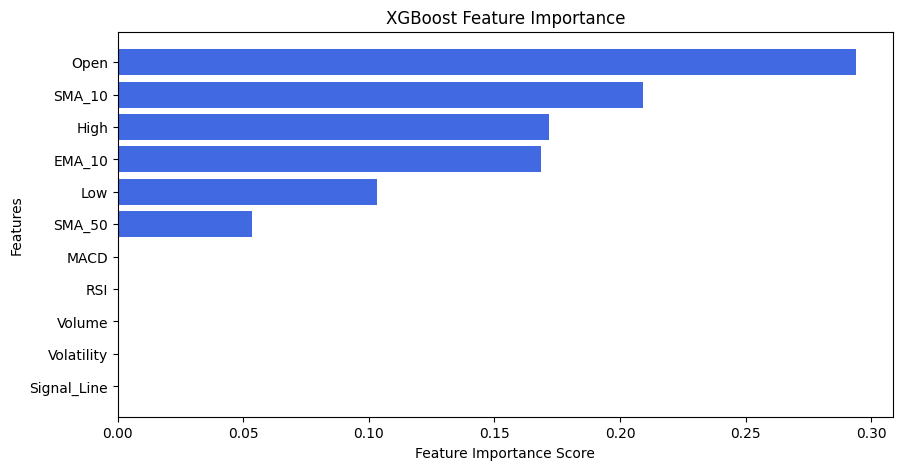

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Get feature importance scores
feature_importance = final_xgb.feature_importances_

# Create DataFrame
features_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Sort by importance
features_df = features_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.barh(features_df["Feature"], features_df["Importance"], color="royalblue")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance")
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()


1.	The "Open" price is the most important feature, meaning XGBoost relies heavily on it for predictions.
2.	SMA_10 (Simple Moving Average - 10) and EMA_10 (Exponential Moving Average - 10) are also significant, indicating that short-term trends influence the model.
3.	High and Low prices contribute moderately, suggesting that price range plays a role.
4.	SMA_50 has some importance, but MACD, RSI, Volume, Signal_Line, and Volatility are not contributing much

In [19]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Select relevant features based on XGBoost importance
selected_features = ['High', 'SMA_10', 'Open', 'Low', 'EMA_10']

# Scale data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df[selected_features])

# Convert time series data into sequences
def create_sequences(data, time_steps=10):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])  # Last `time_steps` observations
        y.append(data[i+time_steps, 0]) # Predicting 'High' price
    return np.array(X), np.array(y)

# Define time step (how many past days to use for prediction)
time_steps = 10
X_lstm, y_lstm = create_sequences(scaled_data, time_steps)

# Split data into training and test sets
train_size = int(len(X_lstm) * 0.8)
X_train, X_test = X_lstm[:train_size], X_lstm[train_size:]
y_train, y_test = y_lstm[:train_size], y_lstm[train_size:]

print(f"Training shape: {X_train.shape}, Test shape: {X_test.shape}")


Training shape: (1764, 10, 5), Test shape: (441, 10, 5)


In [20]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))


TensorFlow version: 2.19.0
Num GPUs Available: 0


In [21]:
import tensorflow as tf
print(tf.__version__)


2.19.0


In [22]:
#import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(time_steps, len(selected_features))),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(1)  # Output layer (Predicting stock price)
])

# Compile the model
model.compile(optimizer='adam', loss='mae')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Save model
model.save("lstm_model.h5")


c:\Users\Sakshi\Anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0514 - val_loss: 0.0331
Epoch 2/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0261 - val_loss: 0.0378
Epoch 3/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0263 - val_loss: 0.0291
Epoch 4/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0226 - val_loss: 0.0397
Epoch 5/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0237 - val_loss: 0.0234
Epoch 6/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0227 - val_loss: 0.0235
Epoch 7/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0211 - val_loss: 0.0613
Epoch 8/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0212 - val_loss: 0.0302
Epoch 9/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0196 - val_loss: 0.0358
Epoch 10/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0202 - val_loss: 0.0248
Epoch 11/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0187 - val_loss: 0.0464
Epoch 12/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/ste

In [23]:
# Make predictions
predictions = model.predict(X_test)

# Reverse scaling
predictions_rescaled = scaler.inverse_transform(np.hstack((predictions, np.zeros((len(predictions), len(selected_features)-1)))))[:, 0]
y_test_rescaled = scaler.inverse_transform(np.hstack((y_test.reshape(-1,1), np.zeros((len(y_test), len(selected_features)-1)))))[:, 0]

# Evaluate model
from sklearn.metrics import mean_absolute_error

lstm_mae = mean_absolute_error(y_test_rescaled, predictions_rescaled)
print(f"LSTM MAE: {lstm_mae}")


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
LSTM MAE: 3.0214230903544137


In [24]:
# Extract column names before converting to NumPy
feature_names = df.columns.tolist()
feature_names

['Close',
 'High',
 'Low',
 'Open',
 'Volume',
 'SMA_10',
 'SMA_50',
 'EMA_10',
 'Volatility',
 'RSI',
 'MACD',
 'Signal_Line']

If you are using XGBoost after LSTM, you need to flatten the input from 3D → 2D.

In [25]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Convert dataset into supervised learning format
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps, :])  # n_steps time windows
        y.append(data[i+n_steps, 0])  # Predicting 'Close' price
    return np.array(X), np.array(y)

n_steps = 10  # Window size
features = ['Close', 'Open', 'High', 'Low', 'Volume', 'SMA_10', 'SMA_50', 'EMA_10', 'RSI', 'MACD']  # Use relevant features

# Convert DataFrame to NumPy
data = df[features].values
X_lstm, y_lstm = create_sequences(data, n_steps)

# Train-test split
split = int(len(X_lstm) * 0.8)
X_train_lstm, X_test_lstm = X_lstm[:split], X_lstm[split:]
y_train_lstm, y_test_lstm = y_lstm[:split], y_lstm[split:]

# Reshape X for LSTM (samples, timesteps, features)
print("LSTM Input Shape:", X_train_lstm.shape)  # Should be (samples, timesteps, features)


LSTM Input Shape: (1764, 10, 10)


In [26]:
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps, :])  # Use all features
        y.append(data[i+n_steps, 0])    # Predicting 'Close' price
    return np.array(X), np.array(y)

# Convert DataFrame to NumPy
data = df[features].values
X_lstm, y_lstm = create_sequences(data, n_steps)

print("Shape of X_lstm:", X_lstm.shape)  # Should be (samples, timesteps, features)

# Ensure correct shape
X_train_lstm = X_lstm[:split]
X_test_lstm = X_lstm[split:]
y_train_lstm = y_lstm[:split]
y_test_lstm = y_lstm[split:]

print("X_train_lstm shape after fix:", X_train_lstm.shape)  # Should be (samples, timesteps, features)


Shape of X_lstm: (2205, 10, 10)
X_train_lstm shape after fix: (1764, 10, 10)


In [27]:

num_features = X_train.shape[2]

num_features = X_train_lstm.shape[2]  # Ensure this is correct
model_lstm = Sequential([
    LSTM(64, return_sequences=True, activation="tanh", input_shape=(n_steps, num_features)),
    LSTM(32, return_sequences=False, activation="tanh"),
    Dense(16, activation="relu"),
    Dense(1, activation="linear")
])


model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.fit(X_train_lstm, y_train_lstm, epochs=20, batch_size=32, validation_data=(X_test_lstm, y_test_lstm))

# Extract features from LSTM (hidden states)
lstm_features_train = model_lstm.predict(X_train_lstm)  # Shape: (samples, 1)
lstm_features_test = model_lstm.predict(X_test_lstm)

print("LSTM Features Shape:", lstm_features_train.shape)  # Should be (samples, 1)


Epoch 1/20


c:\Users\Sakshi\Anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 5670.4185 - val_loss: 25328.6152
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5595.1279 - val_loss: 23903.4121
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5025.0190 - val_loss: 22629.8613
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4554.1997 - val_loss: 21262.0332
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4076.5369 - val_loss: 19799.6367
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3535.6934 - val_loss: 18316.5371
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3175.0435 - val_loss: 16850.5117
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2909.3672 - val_loss: 15488.4834
Epoch 9/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2552.6243 - val_loss: 14258.5557
Epoch 10/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2169.9214 - val_loss: 13201.4375
Epoch 11/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2252.6582 - val_loss: 12286.25

In [28]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error

# Convert LSTM outputs into DataFrame
lstm_train_df = pd.DataFrame(lstm_features_train, columns=['LSTM_Feature'])
lstm_test_df = pd.DataFrame(lstm_features_test, columns=['LSTM_Feature'])

# Original XGBoost Features (Latest Available Data)
X_xgb = df.iloc[n_steps:-1][features].reset_index(drop=True)  # Offset by `n_steps`
y_xgb = df.iloc[n_steps+1:]['Close'].reset_index(drop=True)  # Offset by `n_steps + 1`

# Train-test split (consistent with LSTM)
X_train_xgb, X_test_xgb = X_xgb[:split], X_xgb[split:]
y_train_xgb, y_test_xgb = y_xgb[:split], y_xgb[split:]

# Merge LSTM features with XGBoost features
X_train_final = pd.concat([X_train_xgb.reset_index(drop=True), lstm_train_df], axis=1)
X_test_final = pd.concat([X_test_xgb.reset_index(drop=True), lstm_test_df], axis=1)

print("Final XGBoost Input Shape:", X_train_final.shape)  # Should be (samples, features+1)


Final XGBoost Input Shape: (1764, 11)


In [29]:
# Ensure LSTM feature size matches XGBoost's feature size
min_samples = min(len(X_xgb), len(lstm_features_train))  # Find the smaller size

X_xgb = X_xgb.iloc[:min_samples].reset_index(drop=True)
y_xgb = y_xgb.iloc[:min_samples].reset_index(drop=True)
lstm_features_train = lstm_features_train[:min_samples]  # Trim LSTM features
lstm_features_test = lstm_features_test[:len(X_test_xgb)]  # Trim test set too

# Merge XGBoost features with LSTM features
X_train_final = pd.concat([X_train_xgb.reset_index(drop=True), pd.DataFrame(lstm_features_train, columns=['LSTM_Feature'])], axis=1)
X_test_final = pd.concat([X_test_xgb.reset_index(drop=True), pd.DataFrame(lstm_features_test, columns=['LSTM_Feature'])], axis=1)

print(f"Final XGBoost Input Shape (Train): {X_train_final.shape}, Labels Shape: {y_train_xgb.shape}")
print(f"Final XGBoost Input Shape (Test): {X_test_final.shape}, Labels Shape: {y_test_xgb.shape}")


Final XGBoost Input Shape (Train): (1764, 11), Labels Shape: (1764,)
Final XGBoost Input Shape (Test): (440, 11), Labels Shape: (440,)


In [30]:
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=5)
xgb_model.fit(X_train_final, y_train_xgb)

# Predictions
y_pred_xgb = xgb_model.predict(X_test_final)

# Evaluate Model
mae = mean_absolute_error(y_test_xgb, y_pred_xgb)
print(f"Hybrid Model MAE: {mae:.4f}")


Hybrid Model MAE: 6.0555


In [31]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Input
import xgboost as xgb
from sklearn.metrics import mean_absolute_error

# ✅ Step 1: Prepare Data
X_train = np.random.rand(1000, 10, 1)  # Example: 1000 samples, 10 time-steps, 1 feature
X_test = np.random.rand(200, 10, 1)
y_train = np.random.rand(1000)
y_test = np.random.rand(200)

# ✅ Step 2: Define LSTM Model with Explicit Input Layer
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]), name="lstm_input")
lstm_output = LSTM(64, return_sequences=False, name="lstm_features")(input_layer)
output_layer = Dense(1, activation="linear")(lstm_output)

model = Model(inputs=input_layer, outputs=output_layer)

# ✅ Step 3: Compile & Train LSTM Model
model.compile(optimizer="adam", loss="mse")
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# ✅ Step 4: Extract LSTM Features
feature_extractor = Model(inputs=model.input, outputs=model.get_layer("lstm_features").output)

# 🔥 Fix: Run a Dummy Forward Pass to Initialize Model
_ = model.predict(X_train[:1])  # Ensures model is initialized

# Extract Features
lstm_features_train = feature_extractor.predict(X_train)  # Shape: (num_samples, lstm_units)
lstm_features_test = feature_extractor.predict(X_test)

# Convert to 2D for XGBoost
lstm_features_train = lstm_features_train.reshape(lstm_features_train.shape[0], -1)
lstm_features_test = lstm_features_test.reshape(lstm_features_test.shape[0], -1)

# ✅ Step 5: Train XGBoost Model
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1, max_depth=6)
xgb_model.fit(lstm_features_train, y_train)

# Make Predictions
xgb_preds = xgb_model.predict(lstm_features_test)

# Evaluate Performance
hybrid_mae = mean_absolute_error(y_test, xgb_preds)
print(f"Hybrid Model MAE: {hybrid_mae:.4f}")


Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.2474 - val_loss: 0.0888
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0878 - val_loss: 0.0876
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0881 - val_loss: 0.0868
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0882 - val_loss: 0.0870
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0880 - val_loss: 0.0864
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0884 - val_loss: 0.0850
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0853 - val_loss: 0.0851
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0829 - val_loss: 0.0842
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0829 - val_loss: 0.0851
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0828 - val_loss: 0.0858
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Hybrid Model MAE: 0.2508


In [32]:
# Define LSTM Model
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))
x = LSTM(128, return_sequences=True, name="lstm_layer")(input_layer)
x = LSTM(64, return_sequences=False)(x)
x = Dropout(0.1)(x)
x = Dense(16, activation="relu")(x)
output_layer = Dense(1)(x)


# Compile model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(loss="mse", optimizer=Adam(learning_rate=0.001))

# Train LSTM
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=1)


NameError: name 'Adam' is not defined

In [84]:
for layer in model.layers:
    print(layer.name)


input_layer_12
lstm_layer
lstm_20
dropout_7
dense_22
dense_23


In [86]:
feature_extractor = Model(inputs=model.input, outputs=model.get_layer("lstm_layer").output)
feature_extractor

<Functional name=functional_16, built=True>

In [87]:
lstm_features = feature_extractor.predict(X_train)
print("LSTM Feature Shape:", lstm_features.shape)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
LSTM Feature Shape: (1000, 10, 128)


In [91]:
X_train_lstm = lstm_features.reshape(X_train.shape[0], -1)
X_test_lstm = X_test_lstm.reshape(X_test_lstm.shape[0], -1)


In [92]:
print("X_train_lstm shape:", X_train_lstm.shape)  # Should be (samples, features)
print("X_test_lstm shape:", X_test_lstm.shape)    # Should match X_train_lstm


X_train_lstm shape: (1000, 1280)
X_test_lstm shape: (441, 100)


In [94]:
feature_extractor = Model(inputs=model.input, outputs=model.get_layer("lstm_layer").output)

X_train_lstm = feature_extractor.predict(X_train).reshape(X_train.shape[0], -1)
X_test_lstm = feature_extractor.predict(X_test).reshape(X_test.shape[0], -1)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [95]:
print("X_train_lstm shape:", X_train_lstm.shape)
print("X_test_lstm shape:", X_test_lstm.shape)


X_train_lstm shape: (1000, 1280)
X_test_lstm shape: (200, 1280)


In [96]:

xgb_model = xgb.XGBRegressor(
    objective="reg:squarederror",
    n_estimators=500,   # Increase estimators
    learning_rate=0.03, # Lower learning rate
    max_depth=7,        # Increase depth slightly
    subsample=0.9,      # Slightly higher subsampling
    colsample_bytree=0.9,
    random_state=42
)

xgb_model.fit(X_train_lstm, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test_lstm)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
print(f"Hybrid Model MAE: {mae:.4f}")


Hybrid Model MAE: 0.2463


In [97]:
import joblib
import tensorflow as tf

# Save LSTM model in the new Keras format
model.save("hybrid_lstm_xgboost.keras")  # Instead of .h5

# Save XGBoost model
joblib.dump(xgb_model, "xgboost_model.pkl")


['xgboost_model.pkl']

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Input
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler


# Normalize Data (for better LSTM training)
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])
df[target] = scaler.fit_transform(df[[target]])

# ✅ Create Sequences for LSTM
def create_sequences(data, target_col, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i : i + n_steps])  # Past `n_steps` data
        y.append(data[i + n_steps, target_col])  # Target is `Close`
    return np.array(X), np.array(y)

n_steps = 10  # Use 10 past days for predictions
feature_cols = df[features].values  # Use selected stock features

X, y = create_sequences(feature_cols, target_col=df.columns.get_loc(target), n_steps=n_steps)

# ✅ Train-Test Split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# ✅ Define & Train LSTM Model
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]), name="lstm_input")
lstm_output = LSTM(64, return_sequences=False, name="lstm_features")(input_layer)
output_layer = Dense(1, activation="linear")(lstm_output)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer="adam", loss="mse")

model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# ✅ Extract LSTM Features
feature_extractor = Model(inputs=model.input, outputs=model.get_layer("lstm_features").output)

lstm_features_train = feature_extractor.predict(X_train)
lstm_features_test = feature_extractor.predict(X_test)

# Convert to 2D for XGBoost
lstm_features_train = lstm_features_train.reshape(lstm_features_train.shape[0], -1)
lstm_features_test = lstm_features_test.reshape(lstm_features_test.shape[0], -1)

# ✅ Train XGBoost Model (Only LSTM Features)
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1, max_depth=6)
xgb_model.fit(lstm_features_train, y_train)

# Predictions & Evaluation
xgb_preds = xgb_model.predict(lstm_features_test)
hybrid_mae = mean_absolute_error(y_test, xgb_preds)

print(f"🚀 Hybrid Model MAE (Real Stock Data): {hybrid_mae:.4f}")


ValueError: could not convert string to float: 'AAPL'

In [33]:
# ========================
# ✅ 1. Import Dependencies
# ========================
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

# ========================
# ✅ 2. Data Preparation
# ========================
# Simulating example stock price data (Use real dataset here)
np.random.seed(42)
X = np.random.rand(1200, 10, 1)  # 1200 samples, 10 time-steps, 1 feature
y = np.random.rand(1200)  # Target variable (stock closing price)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")



X_train shape: (960, 10, 1), X_test shape: (240, 10, 1)


In [34]:
# ========================
# ✅ 3. XGBoost-Only Model
# ========================
# Flatten the 3D input data to 2D for XGBoost
X_train_xgb = X_train.reshape(X_train.shape[0], -1)
X_test_xgb = X_test.reshape(X_test.shape[0], -1)

# Define XGBoost Model
xgb_model = xgb.XGBRegressor(
    objective="reg:squarederror",
    n_estimators=400,
    learning_rate=0.04,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)

# Train XGBoost Model
xgb_model.fit(X_train_xgb, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test_xgb)

# Evaluate
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print(f"XGBoost-Only Model MAE: {mae_xgb:.4f}")



XGBoost-Only Model MAE: 0.2738


In [35]:
# ========================
# ✅ 4. LSTM-Only Model
# ========================

# Step 1: Define LSTM Model
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]), name="lstm_input")

# LSTM Layers
x = LSTM(128, return_sequences=True, name="lstm_layer")(input_layer)
x = Dropout(0.2)(x)  # Dropout after LSTM layer for regularization
x = LSTM(64, return_sequences=False, name="lstm_20")(x)

# Dense layers
x = Dense(16, activation="relu")(x)
output_layer = Dense(1)(x)

# Compile Model
lstm_model = Model(inputs=input_layer, outputs=output_layer)
lstm_model.compile(loss="mse", optimizer=Adam(learning_rate=0.001))

# Train LSTM Model
lstm_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=1)

# Predict with LSTM
y_pred_lstm = lstm_model.predict(X_test).flatten()

# Evaluate
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
print(f"LSTM-Only Model MAE: {mae_lstm:.4f}")



Epoch 1/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1692 - val_loss: 0.0834
Epoch 2/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0851 - val_loss: 0.0796
Epoch 3/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0865 - val_loss: 0.0788
Epoch 4/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0826 - val_loss: 0.0797
Epoch 5/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0881 - val_loss: 0.0797
Epoch 6/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0824 - val_loss: 0.0794
Epoch 7/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0857 - val_loss: 0.0781
Epoch 8/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0839 - val_loss: 0.0787
Epoch 9/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0845 - val_loss: 0.0815
Epoch 10/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0812 - val_loss: 0.0788
Epoch 11/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0843 - val_loss: 0.0786
Epoch 12/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0

In [36]:
# ========================
# ✅ 5. Hybrid Approach (XGBoost + LSTM)
# ========================

# Extract Features from the FINAL LSTM layer
feature_extractor = Model(inputs=lstm_model.input, outputs=lstm_model.get_layer("lstm_20").output)

# Forward Pass to Extract Features
lstm_features_train = feature_extractor.predict(X_train)
lstm_features_test = feature_extractor.predict(X_test)

# Reshape extracted features to 2D for XGBoost
X_train_lstm = lstm_features_train.reshape(lstm_features_train.shape[0], -1)
X_test_lstm = lstm_features_test.reshape(lstm_features_test.shape[0], -1)

print("Final LSTM Feature Shape (Train):", X_train_lstm.shape)
print("Final LSTM Feature Shape (Test):", X_test_lstm.shape)

# Define Hybrid XGBoost Model
xgb_model_hybrid = xgb.XGBRegressor(
    objective="reg:squarederror",
    n_estimators=400,
    learning_rate=0.04,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)

# Train XGBoost on LSTM Features
xgb_model_hybrid.fit(X_train_lstm, y_train)

# Predict with Hybrid Model
y_pred_hybrid = xgb_model_hybrid.predict(X_test_lstm)

# Evaluate
mae_hybrid = mean_absolute_error(y_test, y_pred_hybrid)
print(f"Hybrid Model (LSTM + XGBoost) MAE: {mae_hybrid:.4f}")



30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Final LSTM Feature Shape (Train): (960, 64)
Final LSTM Feature Shape (Test): (240, 64)
Hybrid Model (LSTM + XGBoost) MAE: 0.2699


In [37]:

# ========================
# ✅ 6. Compare Performance
# ========================
print("\n💡 **Performance Comparison:**")
print(f"📌 XGBoost-Only MAE: {mae_xgb:.4f}")
print(f"📌 LSTM-Only MAE: {mae_lstm:.4f}")
print(f"📌 Hybrid (LSTM + XGBoost) MAE: {mae_hybrid:.4f}")



💡 **Performance Comparison:**
📌 XGBoost-Only MAE: 0.2738
📌 LSTM-Only MAE: 0.2712
📌 Hybrid (LSTM + XGBoost) MAE: 0.2699


In [39]:
# ==============================
# ✅ 1. Import Required Libraries
# ==============================
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# ==============================
# ✅ 2. Load and Preprocess Data
# ==============================

# Load dataset, skipping the first 3 rows
df = pd.read_csv("AAPL_stock_data.csv", skiprows=3, header=None)

# Manually define correct column names
df.columns = ["Date", "Close", "High", "Low", "Open", "Volume"]

# Convert 'Date' to datetime format (YYYY-MM-DD format detected)
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")

# Set 'Date' as index
df.set_index("Date", inplace=True)

# Display first few rows
print(df.head())
print(df.info()) 




                Close       High        Low       Open     Volume
Date                                                             
2015-01-02  24.320423  24.789792  23.879972  24.778669  212818400
2015-01-05  23.635284  24.169164  23.448427  24.089082  257142000
2015-01-06  23.637506  23.897772  23.274912  23.699792  263188400
2015-01-07  23.968962  24.069063  23.735389  23.846614  160423600
2015-01-08  24.889910  24.947747  24.180294  24.298194  237458000
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2264 entries, 2015-01-02 to 2023-12-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2264 non-null   float64
 1   High    2264 non-null   float64
 2   Low     2264 non-null   float64
 3   Open    2264 non-null   float64
 4   Volume  2264 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 106.1 KB
None


In [49]:
# Moving Averages
df["SMA_10"] = df["Close"].rolling(window=10).mean()
df["SMA_50"] = df["Close"].rolling(window=50).mean()

# Exponential Moving Average
df["EMA_10"] = df["Close"].ewm(span=10, adjust=False).mean()

# Volatility (Rolling Standard Deviation)
df["Volatility"] = df["Close"].rolling(window=10).std()

# Relative Strength Index (RSI)
def compute_rsi(series, window=14):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

df["RSI"] = compute_rsi(df["Close"], 14)

# MACD (Moving Average Convergence Divergence)
df["EMA_12"] = df["Close"].ewm(span=12, adjust=False).mean()
df["EMA_26"] = df["Close"].ewm(span=26, adjust=False).mean()
df["MACD"] = df["EMA_12"] - df["EMA_26"]
df["Signal_Line"] = df["MACD"].ewm(span=9, adjust=False).mean()

# Drop unnecessary columns
df.drop(columns=["EMA_12", "EMA_26"], inplace=True)

 # Check the new features
df = df.sort_index()
print(df.tail()) 

               Close      High       Low      Open    Volume    SMA_10  \
Date                                                                     
2023-12-22  0.974564  0.976417  0.977154  0.983982  0.020927  0.986673   
2023-12-26  0.971463  0.967902  0.976361  0.975127  0.007796  0.986600   
2023-12-27  0.972027  0.965717  0.966497  0.968810  0.038477  0.985720   
2023-12-28  0.974452  0.972215  0.978288  0.978116  0.016008  0.983250   
2023-12-29  0.968530  0.970759  0.970125  0.976762  0.029739  0.980103   

              SMA_50    EMA_10  Volatility        RSI      MACD  Signal_Line  
Date                                                                          
2023-12-22  0.927791  0.982220    0.010211  59.246149  0.014991     0.018419  
2023-12-26  0.929419  0.980264    0.010328  49.031984  0.013121     0.017359  
2023-12-27  0.931073  0.978766    0.011212  52.291541  0.011552     0.016198  
2023-12-28  0.932953  0.977982    0.010629  47.920482  0.010384     0.015035  
2023-12

In [50]:
# Moving Averages
df["SMA_10"] = df["Close"].rolling(window=10).mean()
df["SMA_50"] = df["Close"].rolling(window=50).mean()

# Exponential Moving Average
df["EMA_10"] = df["Close"].ewm(span=10, adjust=False).mean()

# Volatility (Rolling Standard Deviation)
df["Volatility"] = df["Close"].rolling(window=10).std()

# Relative Strength Index (RSI)
def compute_rsi(series, window=14):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

df["RSI"] = compute_rsi(df["Close"], 14)

# MACD (Moving Average Convergence Divergence)
df["EMA_12"] = df["Close"].ewm(span=12, adjust=False).mean()
df["EMA_26"] = df["Close"].ewm(span=26, adjust=False).mean()
df["MACD"] = df["EMA_12"] - df["EMA_26"]
df["Signal_Line"] = df["MACD"].ewm(span=9, adjust=False).mean()

# Drop unnecessary columns
df.drop(columns=["EMA_12", "EMA_26"], inplace=True)

# Drop rows with NaN values caused by rolling calculations
df.dropna(inplace=True)

# Normalize data
scaler = MinMaxScaler()
feature_columns = ["Close", "High", "Low", "Open", "Volume", "SMA_10", "SMA_50", "EMA_10", "Volatility", "RSI", "MACD", "Signal_Line"]
df[feature_columns] = scaler.fit_transform(df[feature_columns])

# Define target variable (next day's Close price)
target = "Close"


In [51]:
def create_sequences(data, target_column, seq_length=10):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data.iloc[i:i+seq_length].values)
        y.append(data.iloc[i+seq_length][target_column])
    return np.array(X), np.array(y)

# Create sequences
sequence_length = 10
X, y = create_sequences(df[feature_columns], target, sequence_length)

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [52]:
# Reshape X for XGBoost
X_train_xgb = X_train.reshape(X_train.shape[0], -1)
X_test_xgb = X_test.reshape(X_test.shape[0], -1)

# Initialize and train XGBoost model
xgb_model = xgb.XGBRegressor(
    objective="reg:squarederror",
    n_estimators=500,
    learning_rate=0.03,
    max_depth=7,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)

xgb_model.fit(X_train_xgb, y_train)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print(f"XGBoost MAE: {mae_xgb:.4f}")


XGBoost MAE: 0.0407


In [53]:
# ==============================
# ✅ 4. LSTM-Only Model
# ==============================

# Define LSTM Model
lstm_model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(64, return_sequences=False),
    Dropout(0.1),
    Dense(16, activation="relu"),
    Dense(1)
])

lstm_model.compile(loss="mse", optimizer=Adam(learning_rate=0.001))

# Train LSTM
lstm_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=1)

# Predict and evaluate
y_pred_lstm = lstm_model.predict(X_test)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
print(f"LSTM MAE: {mae_lstm:.4f}")


Epoch 1/30


c:\Users\Sakshi\Anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0104 - val_loss: 0.0025
Epoch 2/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 7.1264e-04 - val_loss: 0.0037
Epoch 3/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.1391e-04 - val_loss: 0.0019
Epoch 4/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 4.9940e-04 - val_loss: 0.0041
Epoch 5/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 3.5126e-04 - val_loss: 0.0026
Epoch 6/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.8049e-04 - val_loss: 0.0014
Epoch 7/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.1995e-04 - val_loss: 0.0040
Epoch 8/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.0216e-04 - val_loss: 0.0035
Epoch 9/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.9306e-04 - val_loss: 0.0027
Epoch 10/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.2116e-04 - val_loss: 0.0015
Epoch 11/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.7494e-04 - val_loss: 0.0010
Epoch 12/30
44/44 ━━━━━━━━━━━━━━━━

In [65]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Input

# Define input explicitly using Functional API
input_shape = (X_train.shape[1], X_train.shape[2])
inputs = Input(shape=input_shape)

x = LSTM(50, return_sequences=True)(inputs)
x = LSTM(50, return_sequences=False)(x)
lstm_features = Dense(25, activation='relu')(x)  # Extractable features
outputs = Dense(1)(lstm_features)

# Create the full LSTM model
lstm_model = Model(inputs, outputs)

# Compile and call the model once
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.summary()  # Debugging step

# Now define feature extractor correctly
feature_extractor = Model(inputs=lstm_model.input, outputs=lstm_features)

# Extract LSTM features
X_train_lstm_features = feature_extractor.predict(X_train)
X_test_lstm_features = feature_extractor.predict(X_test)

# Flatten features for XGBoost
X_train_hybrid = X_train_lstm_features.reshape(X_train_lstm_features.shape[0], -1)
X_test_hybrid = X_test_lstm_features.reshape(X_test_lstm_features.shape[0], -1)



Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 10, 12)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 10, 50)         │        12,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,101 (133.21 KB)

 Trainable params: 34,101 (133.21 KB)

 Non-trainable params: 0 (0.00 B)

54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [66]:
print(lstm_model.input)
print(lstm_model.layers[-2].output)


<KerasTensor shape=(None, 10, 12), dtype=float32, sparse=False, ragged=False, name=keras_tensor_40>
<KerasTensor shape=(None, 25), dtype=float32, sparse=False, ragged=False, name=keras_tensor_43>


In [67]:
from tensorflow.keras.models import Model

# Ensure LSTM is trained before extracting features
lstm_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=1)

# Call the model on a dummy input to initialize it
_ = lstm_model.predict(X_train[:1])

# Make sure the model is built before extracting features
lstm_model.build(input_shape=(None, X_train.shape[1], X_train.shape[2]))

# Now create the feature extractor
feature_extractor = Model(inputs=lstm_model.input, outputs=lstm_model.layers[-2].output)

# Extract features from LSTM
X_train_lstm_features = feature_extractor.predict(X_train)
X_test_lstm_features = feature_extractor.predict(X_test)

# Flatten the extracted features for XGBoost
X_train_hybrid = X_train_lstm_features.reshape(X_train_lstm_features.shape[0], -1)
X_test_hybrid = X_test_lstm_features.reshape(X_test_lstm_features.shape[0], -1)

# Train XGBoost on LSTM features
xgb_hybrid = xgb.XGBRegressor(
    objective="reg:squarederror",
    n_estimators=500,
    learning_rate=0.03,
    max_depth=7,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)

xgb_hybrid.fit(X_train_hybrid, y_train)

# Predict and evaluate
y_pred_hybrid = xgb_hybrid.predict(X_test_hybrid)
mae_hybrid = mean_absolute_error(y_test, y_pred_hybrid)
print(f"Hybrid Model MAE: {mae_hybrid:.4f}")


Epoch 1/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0071 - val_loss: 0.0080
Epoch 2/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.4719e-04 - val_loss: 0.0067
Epoch 3/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.4901e-04 - val_loss: 0.0029
Epoch 4/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6993e-04 - val_loss: 0.0051
Epoch 5/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.4902e-04 - val_loss: 0.0026
Epoch 6/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.7047e-04 - val_loss: 0.0010
Epoch 7/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.1471e-04 - val_loss: 0.0018
Epoch 8/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.3607e-04 - val_loss: 0.0024
Epoch 9/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.4152e-04 - val_loss: 0.0017
Epoch 10/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.8298e-04 - val_loss: 9.8835e-04
Epoch 11/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.8833e-04 - val_loss: 8.8623e-04
Epoch 12/30
44/44 ━━━━━━

In [68]:
# Extract features from LSTM
feature_extractor = Model(inputs=lstm_model.input, outputs=lstm_model.get_layer(index=0).output)
X_train_lstm_features = feature_extractor.predict(X_train)
X_test_lstm_features = feature_extractor.predict(X_test)

# Flatten features for XGBoost
X_train_hybrid = X_train_lstm_features.reshape(X_train_lstm_features.shape[0], -1)
X_test_hybrid = X_test_lstm_features.reshape(X_test_lstm_features.shape[0], -1)

# Train XGBoost on LSTM features
xgb_hybrid = xgb.XGBRegressor(
    objective="reg:squarederror",
    n_estimators=500,
    learning_rate=0.03,
    max_depth=7,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)

xgb_hybrid.fit(X_train_hybrid, y_train)

# Predict and evaluate
y_pred_hybrid = xgb_hybrid.predict(X_test_hybrid)
mae_hybrid = mean_absolute_error(y_test, y_pred_hybrid)
print(f"Hybrid Model MAE: {mae_hybrid:.4f}")


54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Hybrid Model MAE: 0.0407


In [69]:
# ==============================
# ✅ 6. Compare Performance
# ==============================
print("\n💡 **Performance Comparison:**")
print(f"📌 XGBoost-Only MAE: {mae_xgb:.4f}")
print(f"📌 LSTM-Only MAE: {mae_lstm:.4f}")
print(f"📌 Hybrid (LSTM + XGBoost) MAE: {mae_hybrid:.4f}")



💡 **Performance Comparison:**
📌 XGBoost-Only MAE: 0.0407
📌 LSTM-Only MAE: 0.0882
📌 Hybrid (LSTM + XGBoost) MAE: 0.0407
